In [1]:
#import the dataset
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv")
data.head()

<IPython.core.display.Javascript object>

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
#checking null value presnt or not
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
#checking how many feature are present
data.shape

(244, 7)

In [45]:
data.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [20]:
#here the target variable is tip so now we need to vizualize the data to understand the data distribution pattern
import plotly.express as px
figure = px.scatter(data_frame=data,x="total_bill",y="tip",color="day",trendline="ols",title="Correlation between Total Bill & Tip based on Day")
figure.show()

In [21]:
figure = px.scatter(data_frame=data,x="total_bill",y="tip",color="sex",trendline="ols",title="Correlation between Total Bill & Tip based on Sex")
figure.show()

In [22]:
figure = px.scatter(data_frame=data,x="total_bill",y="tip",color="time",trendline="ols",title="Correlation between Total Bill & Tip based on Time")
figure.show()

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation between Total Bill & Tip based on Day')

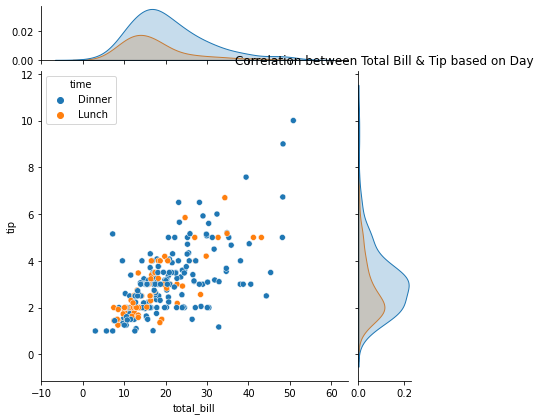

In [27]:
sns.jointplot("total_bill","tip",data=data,color="orange",marginal_ticks=True,hue="time",kind="scatter")
plt.title("Correlation between Total Bill & Tip based on Day")

In [33]:
figure = px.pie(data_frame=data,values="tip",names="sex",title="Pie Chart Tip Based on Sex",hole=0.5)
figure.show()

In [39]:
figure = px.pie(data_frame=data,values="tip",names="day",title="Pie Chart Tip Based on Day",hole=0.5)
figure.show()

In [38]:
figure = px.pie(data_frame=data,values="tip",names="smoker",title="Pie Chart Tip Based on Smoker",hole=0.5)
figure.show()

In [37]:
figure = px.pie(data_frame=data,values="tip",names="time",title="Pie Chart Tip Based on Time",hole=0.5)
figure.show()

<IPython.core.display.Javascript object>

<AxesSubplot:>

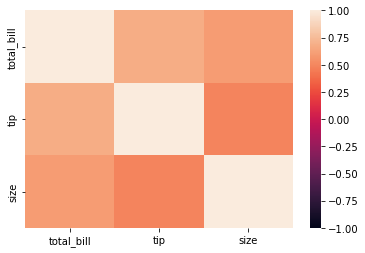

In [40]:
#correlation graph
sns.heatmap(data.corr(),vmax=1,vmin=-1)

In [42]:
data_cor = data.corr()
data_cor

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [43]:
data_cor['tip'].sort_values(ascending=False)

tip           1.000000
total_bill    0.675734
size          0.489299
Name: tip, dtype: float64

In [46]:
#now above all the graph we are able to find out that total bill & tip are correlated & all categorical feature like 
# tip strongly correlated with male sex
#tip strongly correleated with day - sturday
#tip strongly correlated with day - wwekends - Saturday & Sunday
#tip correlated with time - Dinner

In [50]:
#now we need to encode are categorical feature to numerical feature so that we are using the manual mapping 
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [52]:
#now we are dividing train & test split 
x = np.array(data.drop(['tip'],1))
y = np.array(data["tip"])

<IPython.core.display.Javascript object>

D:\Users\UDCSI-WS-016\AppData\Local\Temp\1\ipykernel_11076\3948415190.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



<IPython.core.display.Javascript object>

In [60]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(xtrain,ytrain)

LinearRegression()

In [62]:
linear_r.score(xtest,ytest)

0.4429399687489898

In [63]:
features = np.array([[24.50, 1, 0, 0, 1, 4]])
linear_r.predict(features)

<IPython.core.display.Javascript object>

array([3.73742609])

In [64]:
#make prediction 
prediction_y = linear_r.predict(xtest)

In [65]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"The Mean Sqared Error is -{mean_squared_error(y_true=ytest,y_pred=prediction_y)}")
print(f"The Root Mean Sqared Error is -{np.sqrt(mean_squared_error(y_true=ytest,y_pred=prediction_y))}")
print(f"The R Sqare Error is -{r2_score(y_true=ytest,y_pred=prediction_y)}")

The Mean Sqared Error is -0.6963090766605349


<IPython.core.display.Javascript object>

The Root Mean Sqared Error is -0.83445136266923
The R Sqare Error is -0.4429399687489898


In [66]:
#so in that case we need to change our algorithm it's underfit 